In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
df = pd.read_csv('dec-land-acquisition-annual-reports-beginning-1990.csv')

In [4]:
df.head()

,DEC Region,Land Acquisition Category,County,Project Number,Project Name (Alias),Acres (Fee),Acres (Conservation Easement),Equivalent Stream Miles,Deed Vesting Date
0,2,E-ESB,Richmond,7,Todt Hill,52.522,18.0,NaN,1990-01-04T00:00:00.000
1,4,Q-FWL,Columbia,32.02,Nutten Hook,0.000,NaN,NaN,1990-03-09T00:00:00.000
2,4,Q-FWL,Columbia,32.01,Nutten Hook,0.000,NaN,NaN,1990-03-09T00:00:00.000
3,4,Q-FWL,Columbia,32,Nutten Hook,0.000,NaN,NaN,1990-03-09T00:00:00.000
4,4,Q-FWL,Columbia,32.03,Nutten Hook,76.000,NaN,NaN,1990-03-09T00:00:00.000


In [7]:
gdf = gpd.read_file('DEC_lands/DEClands.shp')

In [8]:
gdf.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,2746,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,223.803334,4252,N,https://www.dec.ny.gov/lands/22574.html,9.057000e+05,5609.447134,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,2747,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,114.466837,4019,N,https://www.dec.ny.gov/lands/22574.html,4.632309e+05,2723.724659,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [10]:
data = gdf.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [11]:
data['CLASS'].value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [12]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [15]:
#!pip install descartes

<AxesSubplot:>

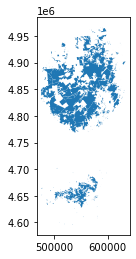

In [16]:
wild_lands.plot()

In [40]:
watersheds = gpd.read_file('DEC_lands/aa_aas_watersheds.shp')

In [41]:
watersheds.head()

,OBJECTID,NYBASINS_,NYBASINS_I,AREA_MI,SHAPE_AREA,SHAPE_LEN,geometry
0,37,2142,2387,3.94111,1.020764e+07,14909.391055,"POLYGON ((553476.455 4812123.342, 553478.642 4..."
1,38,2144,2389,1.08294,2.804869e+06,7597.367796,"POLYGON ((553857.280 4811934.340, 553885.281 4..."
2,39,2154,2400,12.36730,3.203118e+07,34214.581886,"POLYGON ((561554.985 4809739.818, 561569.110 4..."
3,40,2169,2416,7.47654,1.936438e+07,32791.018281,"POLYGON ((559998.200 4810766.306, 560040.701 4..."
4,41,2171,2418,1.54621,4.004728e+06,11446.315849,"POLYGON ((555945.728 4810704.331, 555956.228 4..."


<AxesSubplot:>

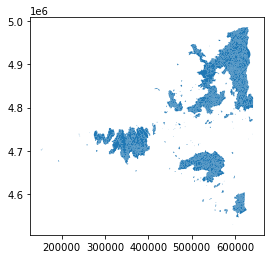

In [42]:
watersheds.plot()

In [37]:
access = gpd.read_file('ambulances/AccessibleDestinations.shp')

In [38]:
access.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    143 non-null    int64   
 1   REG         143 non-null    object  
 2   COUNTY      143 non-null    object  
 3   NAME        143 non-null    object  
 4   FEATURE     143 non-null    object  
 5   DESCRIPTN   45 non-null     object  
 6   PRIMTVESET  143 non-null    object  
 7   TENTSITE_S  143 non-null    object  
 8   LEANTO      143 non-null    object  
 9   PICNCTBL_S  143 non-null    object  
 10  PRIVY       143 non-null    object  
 11  TRAIL_S     143 non-null    object  
 12  EQUESTR     143 non-null    object  
 13  SCENICOVLK  143 non-null    object  
 14  INTERPMTRL  143 non-null    object  
 15  WLVIEWPLAT  143 non-null    object  
 16  HUNTGBLIND  143 non-null    object  
 17  FSHPIERETC  143 non-null    object  
 18  BOATLAUNCH  143 non-null    object  
 19  

<AxesSubplot:>

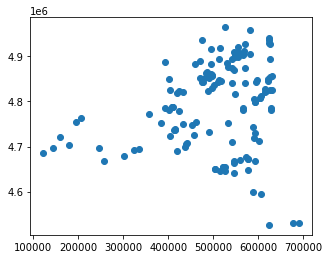

In [43]:
access.plot()

Head over to the GIS.NY.GOV data page [here](http://gis.ny.gov/gisdata/inventories/byorgsector.cfm) and see if you can find a dataset of interest that allows you to generate an interesting map.